In [2]:
#downloading dataset, importing libraries
import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

import seaborn as sns

import sys

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#from sklearn import svm
from sklearn.svm import SVR

In [3]:
#reading the dataset, deleting missing value entries
df = pd.read_csv('avocado.csv')



df.head()

df.dropna()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
#printing columns
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
# encoding "type" and selecting features
enc = OrdinalEncoder()


df[['type']] = enc.fit_transform(df[['type']])


selected_features = df[['Total Volume','4046', '4225', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags','type','year']]
display(selected_features)


,Total Volume,4046,4225,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,64236.62,1036.74,54454.85,8696.87,8603.62,93.25,0.0,0.0,2015
1,54876.98,674.28,44638.81,9505.56,9408.07,97.49,0.0,0.0,2015
2,118220.22,794.70,109149.67,8145.35,8042.21,103.14,0.0,0.0,2015
3,78992.15,1132.00,71976.41,5811.16,5677.40,133.76,0.0,0.0,2015
4,51039.60,941.48,43838.39,6183.95,5986.26,197.69,0.0,0.0,2015
...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,13498.67,13066.82,431.85,0.0,1.0,2018
18245,13888.04,1191.70,3431.50,9264.84,8940.04,324.80,0.0,1.0,2018
18246,13766.76,1191.92,2452.79,9394.11,9351.80,42.31,0.0,1.0,2018
18247,16205.22,1527.63,2981.04,10969.54,10919.54,50.00,0.0,1.0,2018


In [6]:
#selecting and scaling X variable (selected features)
scaler = StandardScaler()

X = scaler.fit_transform(selected_features)

In [7]:
# defining y variable

y = df['AveragePrice'].values

In [8]:
#creating a split (train/test)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=45)


#creating a split (train/val)

X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=45)

# now the train/validate/test split will be 80%/10%/10%


In [9]:
#training KN regressor for testing
score = []
for i in range(1,100):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    outputs = knn.predict(X_test)
    
    score.append (mean_squared_error(y_test, outputs))

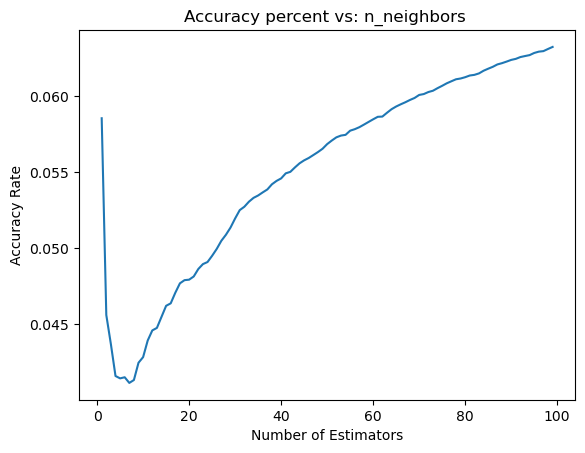

In [10]:
#plotting accuracy percentage vs n_neighbors


plt.plot(range(1,100), score)
plt.title("Accuracy percent vs: n_neighbors ")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy Rate")

plt.show()

In [11]:
#printing R squared score (test)
knn.score(X_test, y_test)

0.6067856080974825

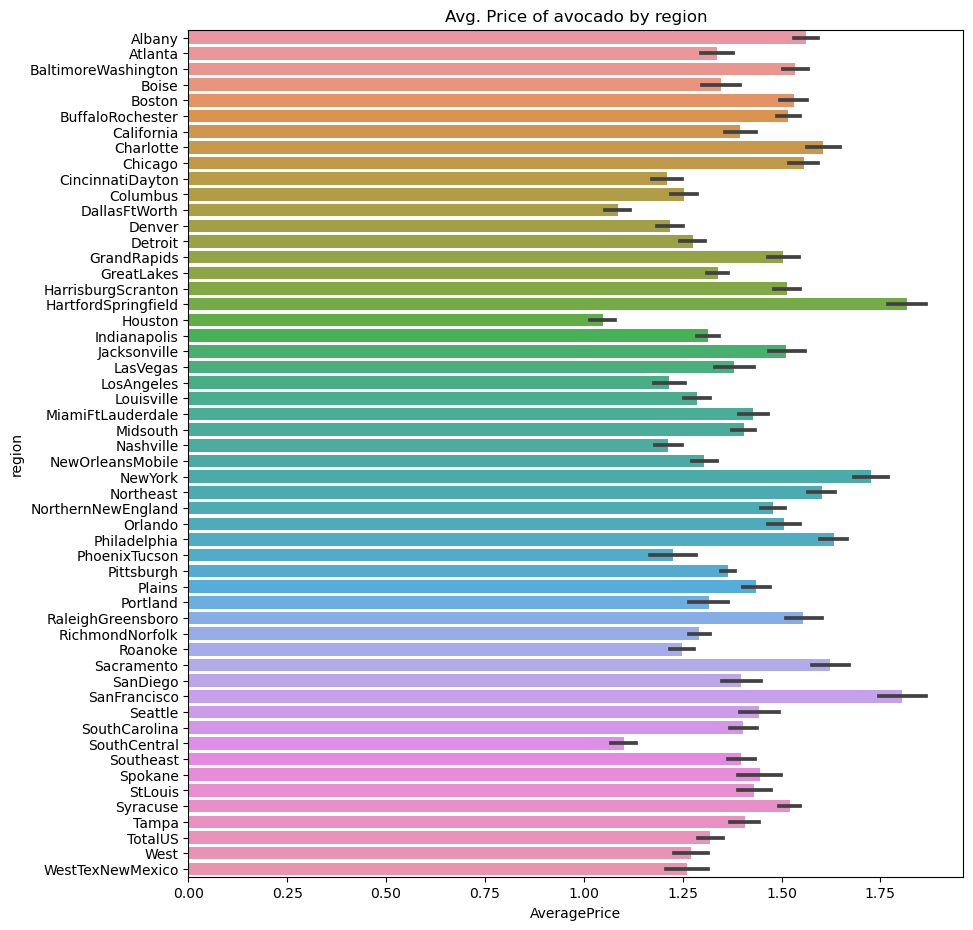

In [12]:
#visualization to determine average price per region
plt.figure(figsize =(10,11))
plt.title("Avg. Price of avocado by region")
Av = sns.barplot(x = "AveragePrice", y = "region", data = df)



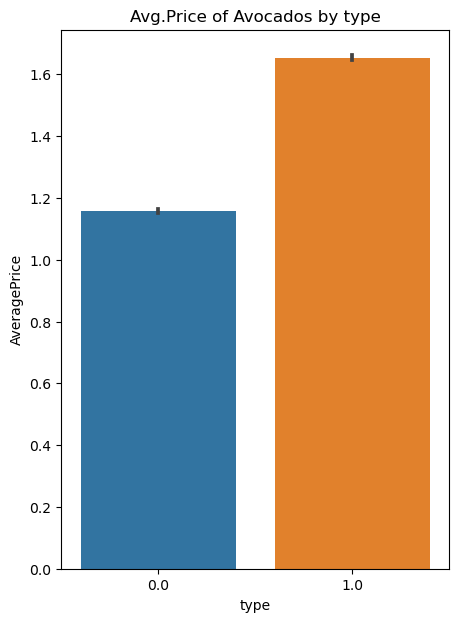

In [13]:
#average price of avocados by type
plt.figure(figsize =(5,7))
plt.title("Avg.Price of Avocados by type")
Av = sns.barplot(x="type", y= "AveragePrice", data = df)


In [14]:
#training SVR Regressor model withmax iterations of 10,000

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    dat = SVR(kernel = i, max_iter = 10000)
    
    dat.fit(X_train, y_train)
    scores = dat.score(X_test, y_test)
    print (i, scores)

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


linear -0.4057489957292755


C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


poly -118.1188791570082
rbf 0.49772717115242227


C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


sigmoid -253144.96519506947


In [15]:
#conclusion
print ("KNN regressor offer's higher accuracy as compared to the SVR Regressor. However, the 'rbf' kernel's accuracy is close enough")

KNN regressor offer's higher accuracy as compared to the SVR Regressor. However, the 'rbf' kernel's accuracy is close enough


In [16]:
#printing R squared score (test)
knn.score(X_val, y_val)

0.6138240703772262